<a href="https://colab.research.google.com/github/Astupidiit/customer_value/blob/main/customer_smart_sense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/Customer-Value-Analysis-dataset (1).csv')

In [ ]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

**EDA**

In [ ]:
offer_groups = df.groupby('Renew Offer Type')

In [ ]:
df['Renew Offer Type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [ ]:
offer_1 = offer_groups.get_group('Offer1')
print("the number times offer 1 was given was: ",offer_1.shape[0],'\nwhich is ',offer_1.shape[0]/df.shape[0]*100)

the number times offer 1 was given was:  3752 
which is  41.07729362820232


In [ ]:
offer_2 = offer_groups.get_group('Offer2')
print("the number times offer 1 was given was: ",offer_2.shape[0],'\nwhich is ',offer_2.shape[0]/df.shape[0]*100)

the number times offer 1 was given was:  2926 
which is  32.034158090650315


In [ ]:
offer_3 = offer_groups.get_group('Offer3')
print("the number times offer 1 was given was: ",offer_3.shape[0],'\nwhich is ',offer_3.shape[0]/df.shape[0]*100)

the number times offer 1 was given was:  1432 
which is  15.677687760017516


In [ ]:
offer_3 = offer_groups.get_group('Offer3')
print("the number times offer 1 was given was: ",offer_3.shape[0],'\nwhich is ',offer_3.shape[0]/df.shape[0]*100)

the number times offer 1 was given was:  1432 
which is  15.677687760017516


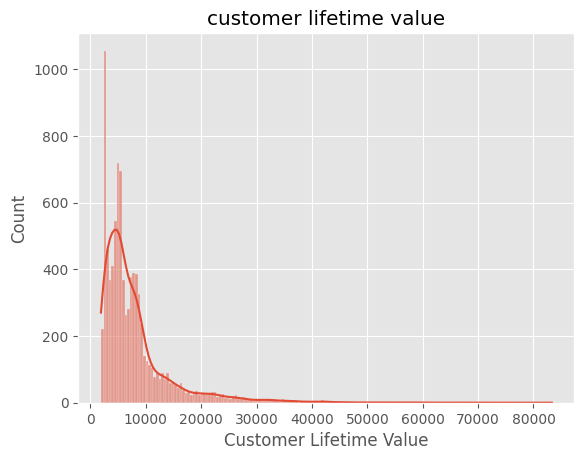

In [ ]:
# Customer Lifetime Value
plt.style.use('ggplot')
sns.histplot(data = df, x='Customer Lifetime Value',kde=True)
plt.title('customer lifetime value')
plt.show()

In [ ]:
print('the max value is ',round(df['Customer Lifetime Value'].max(),2))
print('the min value is ',round(df['Customer Lifetime Value'].min(),2))
print('the mean value is ',round(df['Customer Lifetime Value'].mean(),2))
print('the median value is ',round(df['Customer Lifetime Value'].median(),2))
if df['Customer Lifetime Value'].median()<df['Customer Lifetime Value'].mean():
    print('the data is Right-Skewed')
elif df['Customer Lifetime Value'].median()>df['Customer Lifetime Value'].mean():
    print('the data is Left-Skewed')

the max value is  83325.38
the min value is  1898.01
the mean value is  8004.94
the median value is  5780.18
the data is Right-Skewed


Text(0.5, 1.0, 'Total CLV by ploicy')

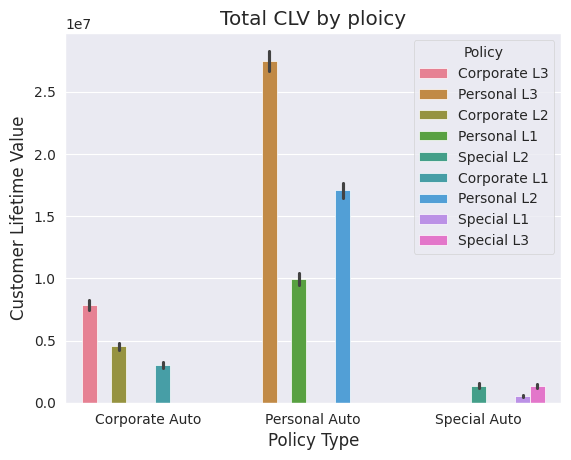

In [ ]:
#  total CLV by policy
sns.set_style(style='darkgrid')
sns.barplot(data=df,x='Policy Type',y='Customer Lifetime Value',hue='Policy',estimator='sum')
plt.title('Total CLV by ploicy')

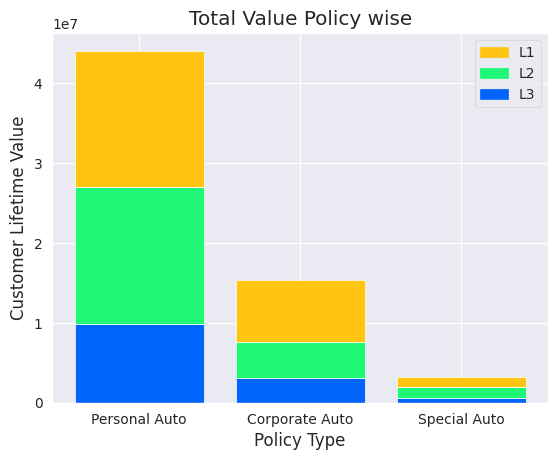

In [ ]:
import matplotlib.patches as mpatches
from matplotlib import style
policy_groups = df.groupby('Policy')
sns.set_style(style='darkgrid')
#for bottom plot
df_11 = policy_groups.get_group('Personal L1')
df_21 = policy_groups.get_group('Corporate L1')
df_31 = policy_groups.get_group('Special L1')
df_temp1 = pd.concat([df_11,df_21,df_31],ignore_index = True)

h11 = int(df_temp1[df_temp1['Policy']=='Personal L1']['Customer Lifetime Value'].sum())
h21 = int(df_temp1[df_temp1['Policy']=='Corporate L1']['Customer Lifetime Value'].sum())
h31 = int(df_temp1[df_temp1['Policy']=='Special L1']['Customer Lifetime Value'].sum())

bar1 = plt.bar(x=df_temp1['Policy Type'].unique(),height=[h11,h21,h31], color=sns.xkcd_rgb['bright blue'])


# for middle plot
df_12 = policy_groups.get_group('Personal L2')
df_22 = policy_groups.get_group('Corporate L2')
df_32 = policy_groups.get_group('Special L2')
df_temp2 = pd.concat([df_12,df_22,df_32],ignore_index = True)

h12 = int(df_temp2[df_temp2['Policy']=='Personal L2']['Customer Lifetime Value'].sum())
h22 = int(df_temp2[df_temp2['Policy']=='Corporate L2']['Customer Lifetime Value'].sum())
h32 = int(df_temp2[df_temp2['Policy']=='Special L2']['Customer Lifetime Value'].sum())

bar2 = plt.bar(x=df_temp2['Policy Type'].unique(),height=[h12,h22,h32], bottom = [h11,h21,h31],
               color=sns.xkcd_rgb['spearmint'])

#for top plot
df_13 = policy_groups.get_group('Personal L3')
df_23 = policy_groups.get_group('Corporate L3')
df_33 = policy_groups.get_group('Special L3')
df_temp3 = pd.concat([df_13,df_23,df_33],ignore_index = True)

h13 = int(df_temp3[df_temp3['Policy']=='Personal L3']['Customer Lifetime Value'].sum())
h23 = int(df_temp3[df_temp3['Policy']=='Corporate L3']['Customer Lifetime Value'].sum())
h33 = int(df_temp3[df_temp3['Policy']=='Special L3']['Customer Lifetime Value'].sum())

bar3 = plt.bar(x=df_temp3['Policy Type'].unique(),height=[h12,h23,h33],bottom =np.array([h11,h21,h31]) + np.array([h12,h22,h32]) ,
               color=sns.xkcd_rgb['sunflower'])


#add legend
top_bar = mpatches.Patch(color=sns.xkcd_rgb['sunflower'], label='L1')
medium_bar = mpatches.Patch(color=sns.xkcd_rgb['spearmint'], label='L2')
bottom_bar = mpatches.Patch(color=sns.xkcd_rgb['bright blue'], label='L3')
plt.legend(handles=[top_bar,medium_bar, bottom_bar])
plt.title('Total Value Policy wise')
plt.ylabel('Customer Lifetime Value')
plt.xlabel('Policy Type')
# plt.style.use('Solarize_Light2')
plt.show()

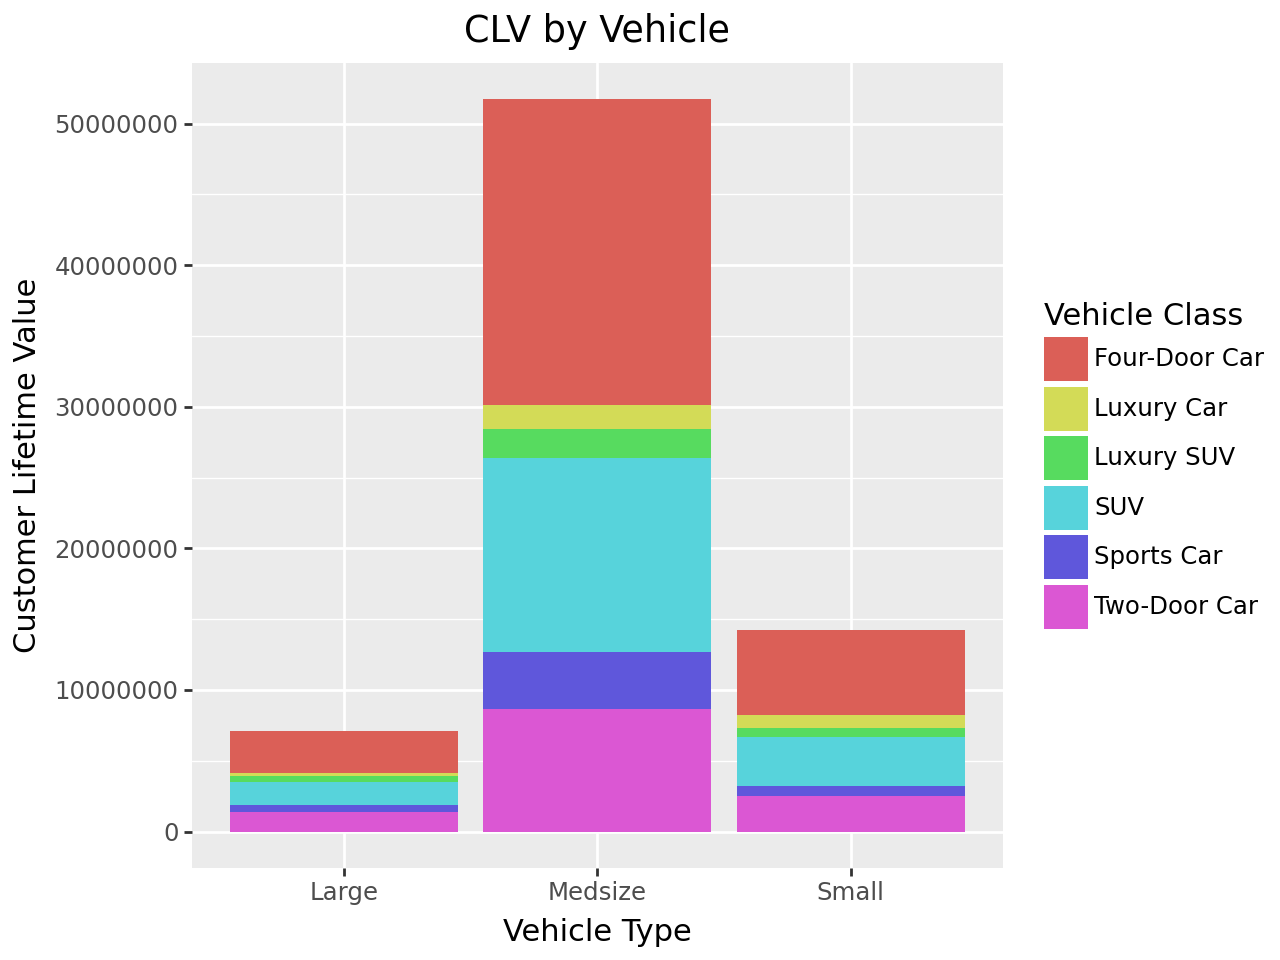

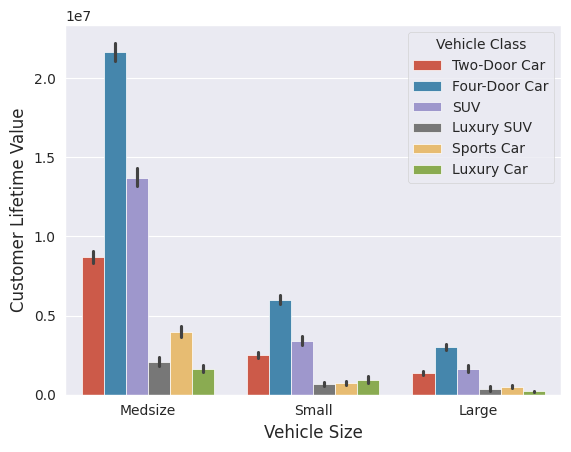

In [ ]:
sns.barplot(x=df['Vehicle Size'],y=df['Customer Lifetime Value'],hue =df['Vehicle Class'],estimator = 'sum')
from plotnine import ggplot, aes, labs, geom_col

(
    ggplot(df)
    + aes(x='Vehicle Size', y='Customer Lifetime Value',fill ='Vehicle Class')
    +geom_col()
    + labs(
        x='Vehicle Type',
        y='Customer Lifetime Value',
        title="CLV by Vehicle",
    )
         )


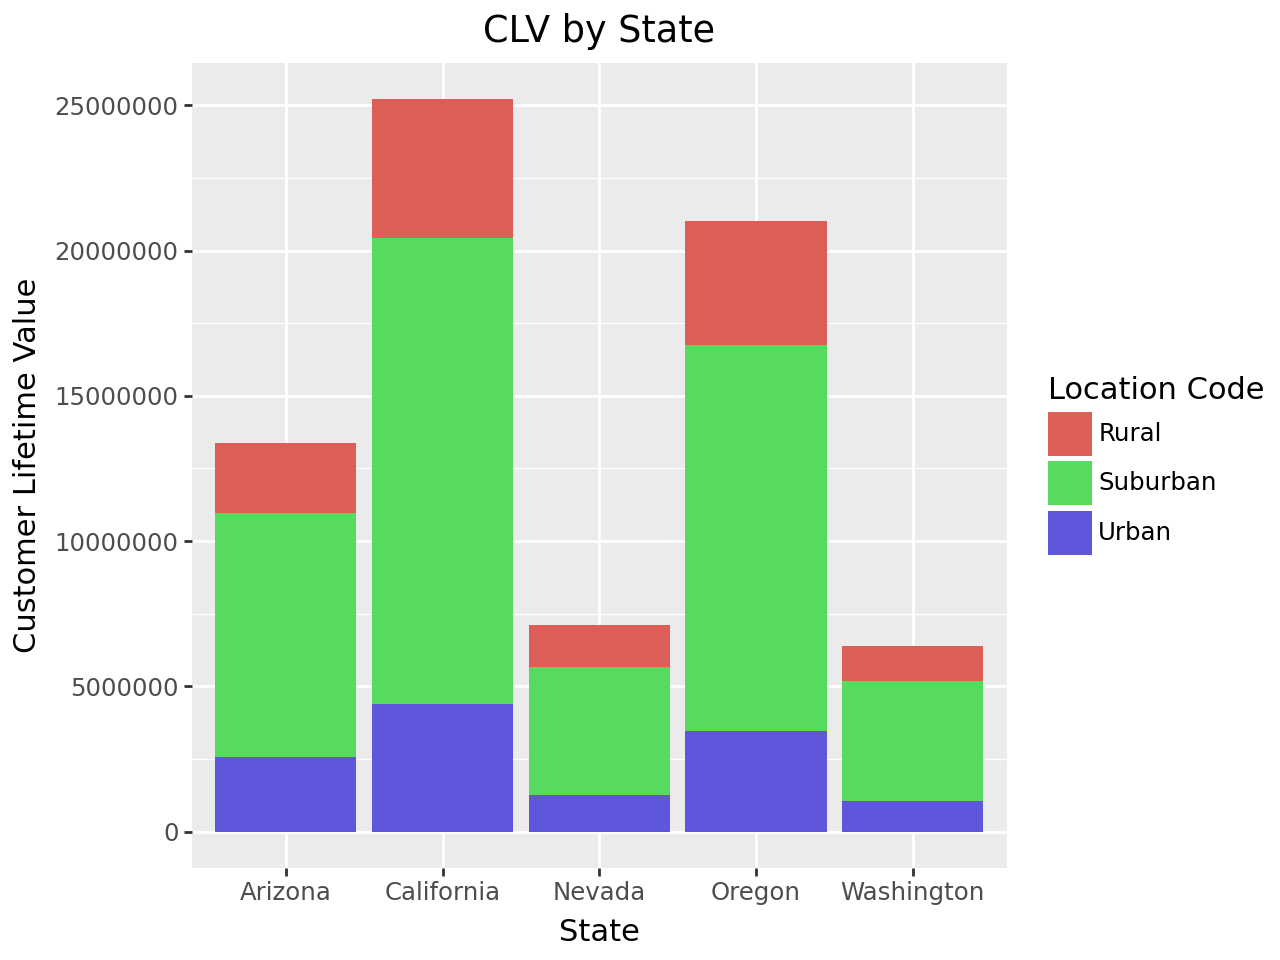

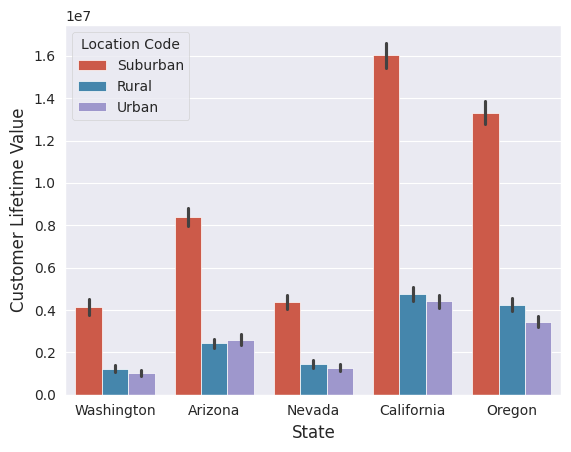

In [ ]:
sns.barplot(data=df,x='State', y='Customer Lifetime Value',estimator='sum',hue='Location Code')
(
    ggplot(df)
    + aes(x='State', y='Customer Lifetime Value',fill ='Location Code')
    +geom_col()
    + labs(
        x='State',
        y='Customer Lifetime Value',
        title="CLV by State",
    )
         )


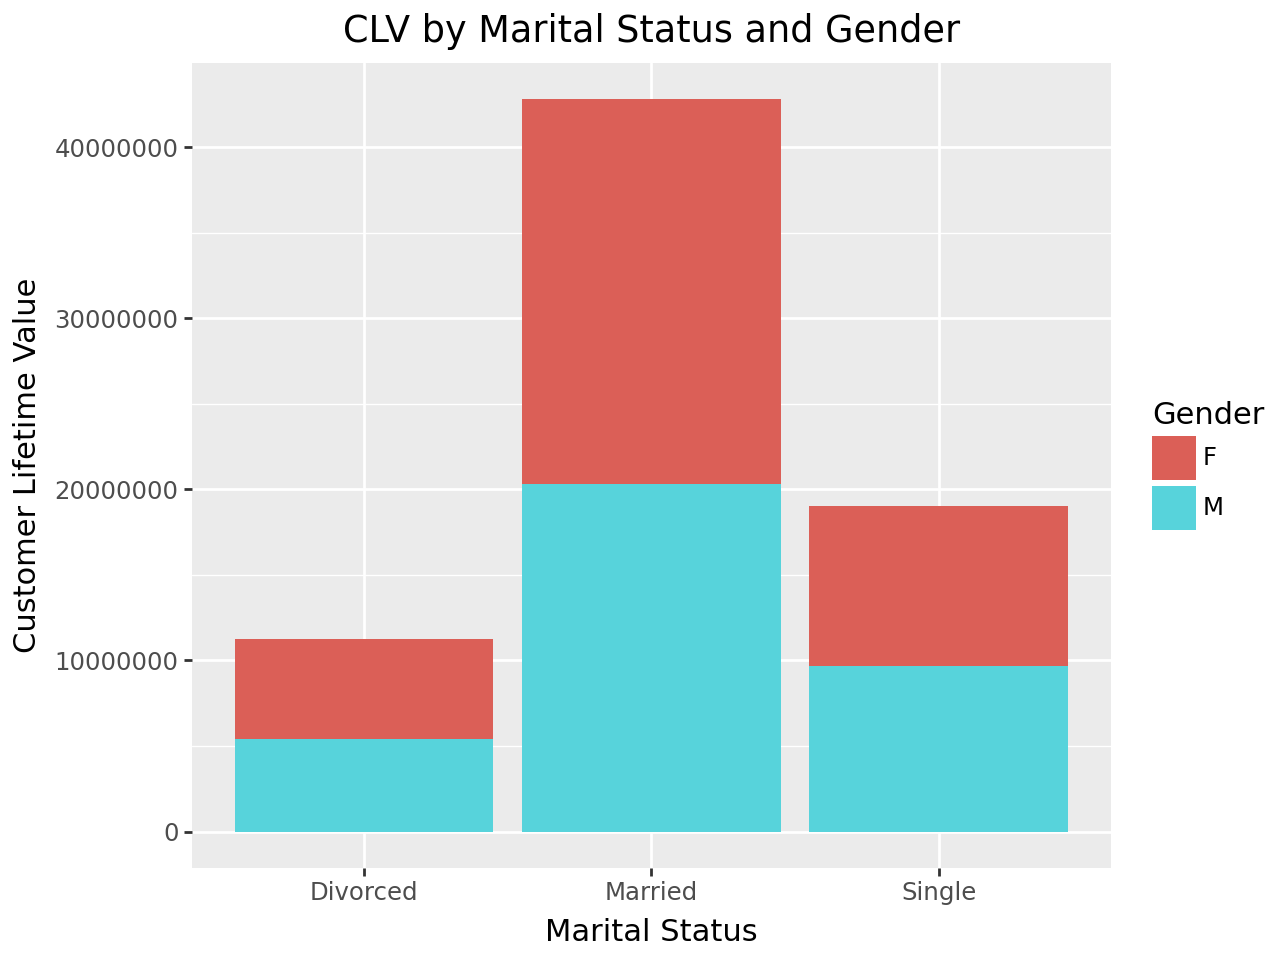

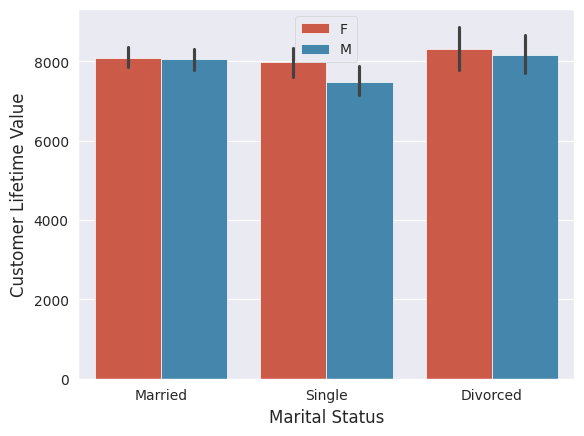

In [ ]:
sns.barplot(data = df, x='Marital Status', y='Customer Lifetime Value',hue ='Gender')
plt.legend()
(
    ggplot(df)
    + aes(x='Marital Status', y='Customer Lifetime Value',fill ='Gender')
    +geom_col()
    + labs(
        x='Marital Status',
        y='Customer Lifetime Value',
        title="CLV by Marital Status and Gender",
    )
         )


<Axes: >

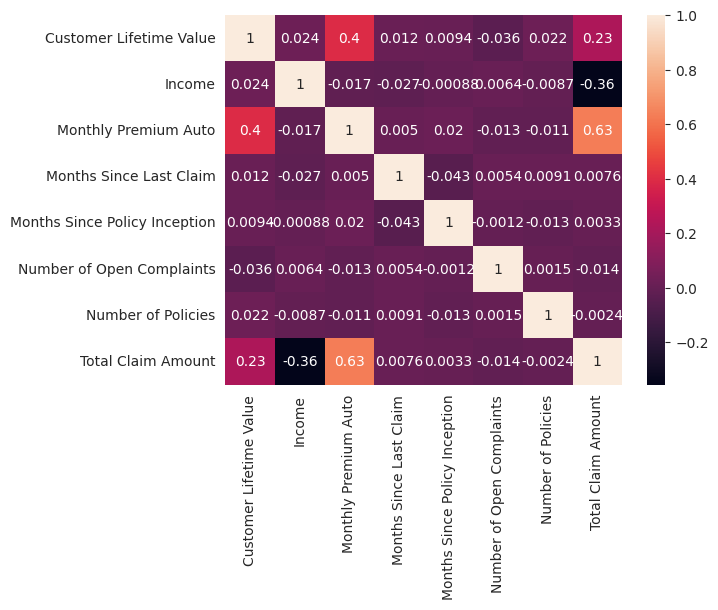

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr,annot=True)

CLV has the highest correlation with Monthly premium and Total Claim Amount

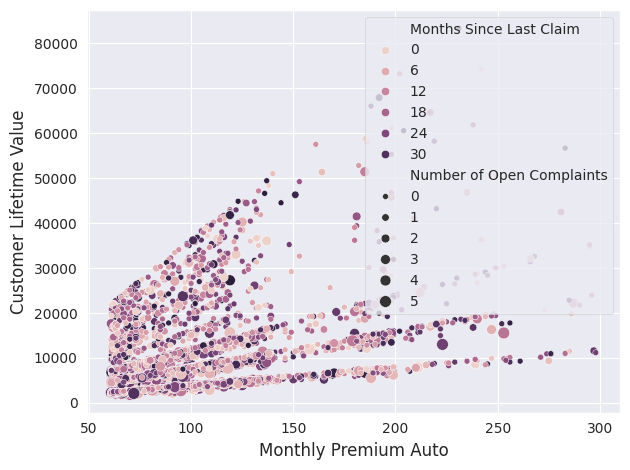

In [ ]:
sns.scatterplot(x=df['Monthly Premium Auto'], y= df['Customer Lifetime Value'],hue =df['Months Since Last Claim'],size =df['Number of Open Complaints'])
plt.tight_layout()

Customers with higher value monthly premium wiith no recent claim and low number of complaints are the ones with higher customer Lifetime value

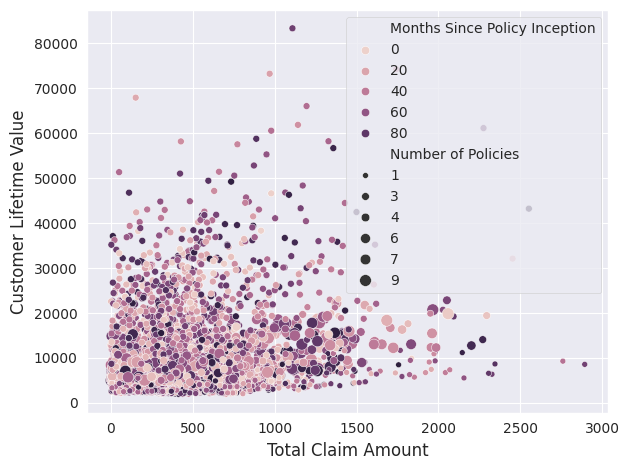

In [ ]:
sns.scatterplot(x=df['Total Claim Amount'], y= df['Customer Lifetime Value'],hue =df['Months Since Policy Inception'],size =df['Number of Policies'])
plt.tight_layout()

customers with lower claim amount(many months have passed since last claim) and and having lower number of policies are of higher CLV

<Axes: xlabel='Renew Offer Type', ylabel='Customer Lifetime Value'>

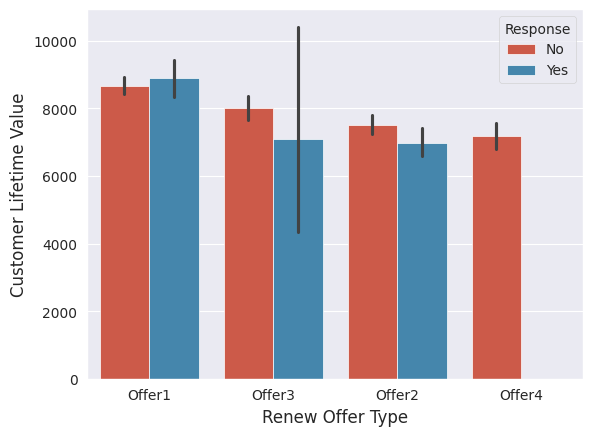

In [ ]:
sns.barplot(data=df, x='Renew Offer Type', y ='Customer Lifetime Value', hue ='Response', estimator='mean')

**Renew Offer Type**

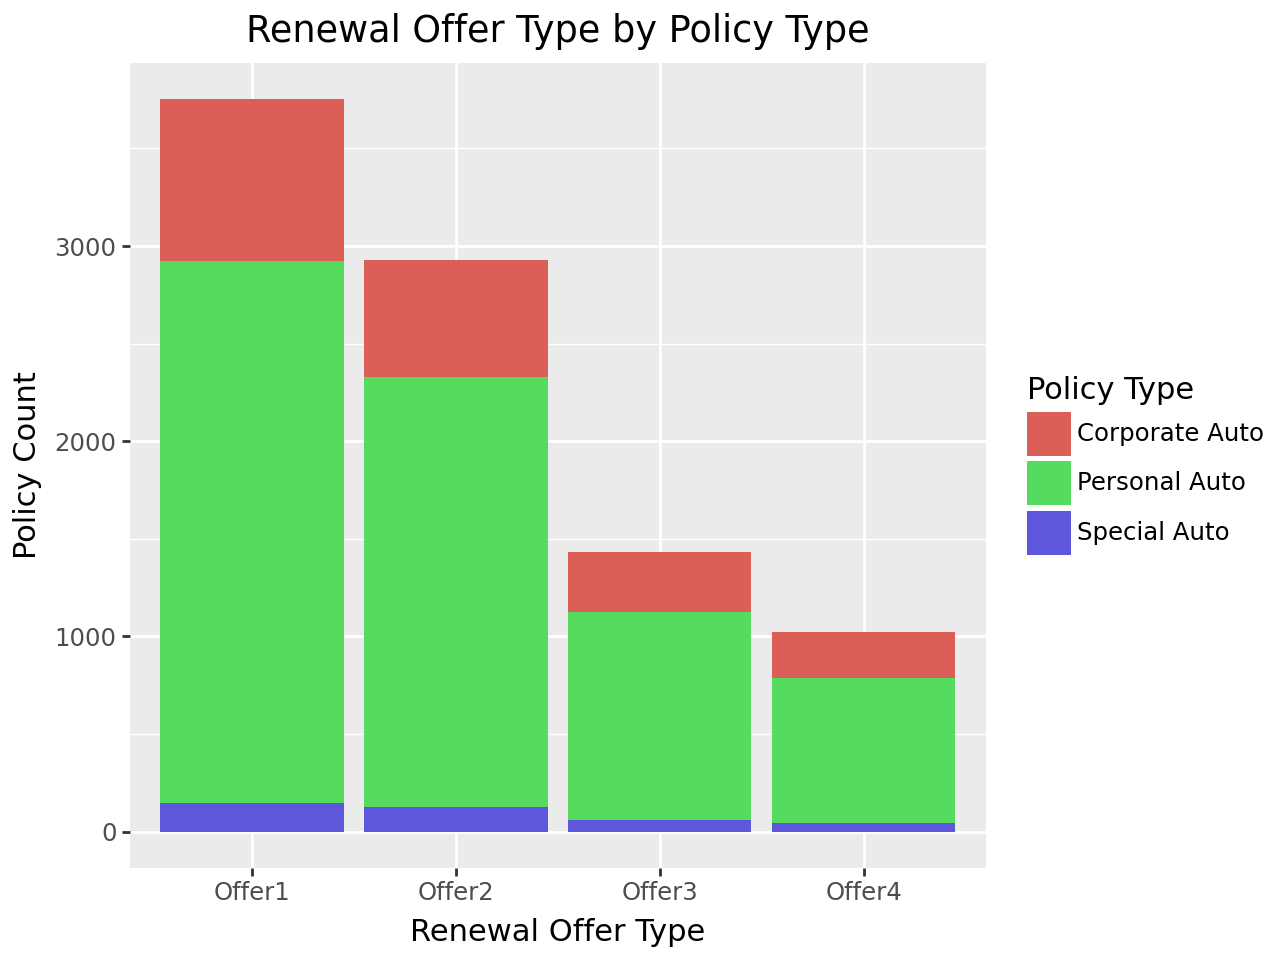

In [ ]:
from plotnine import geom_bar
(
    ggplot(df)
    + aes(x='Renew Offer Type',fill ='Policy Type')
    +geom_bar(stat='count')
    + labs(
        x='Renewal Offer Type',
        y='Policy Count',
        title="Renewal Offer Type by Policy Type",
    )
         )

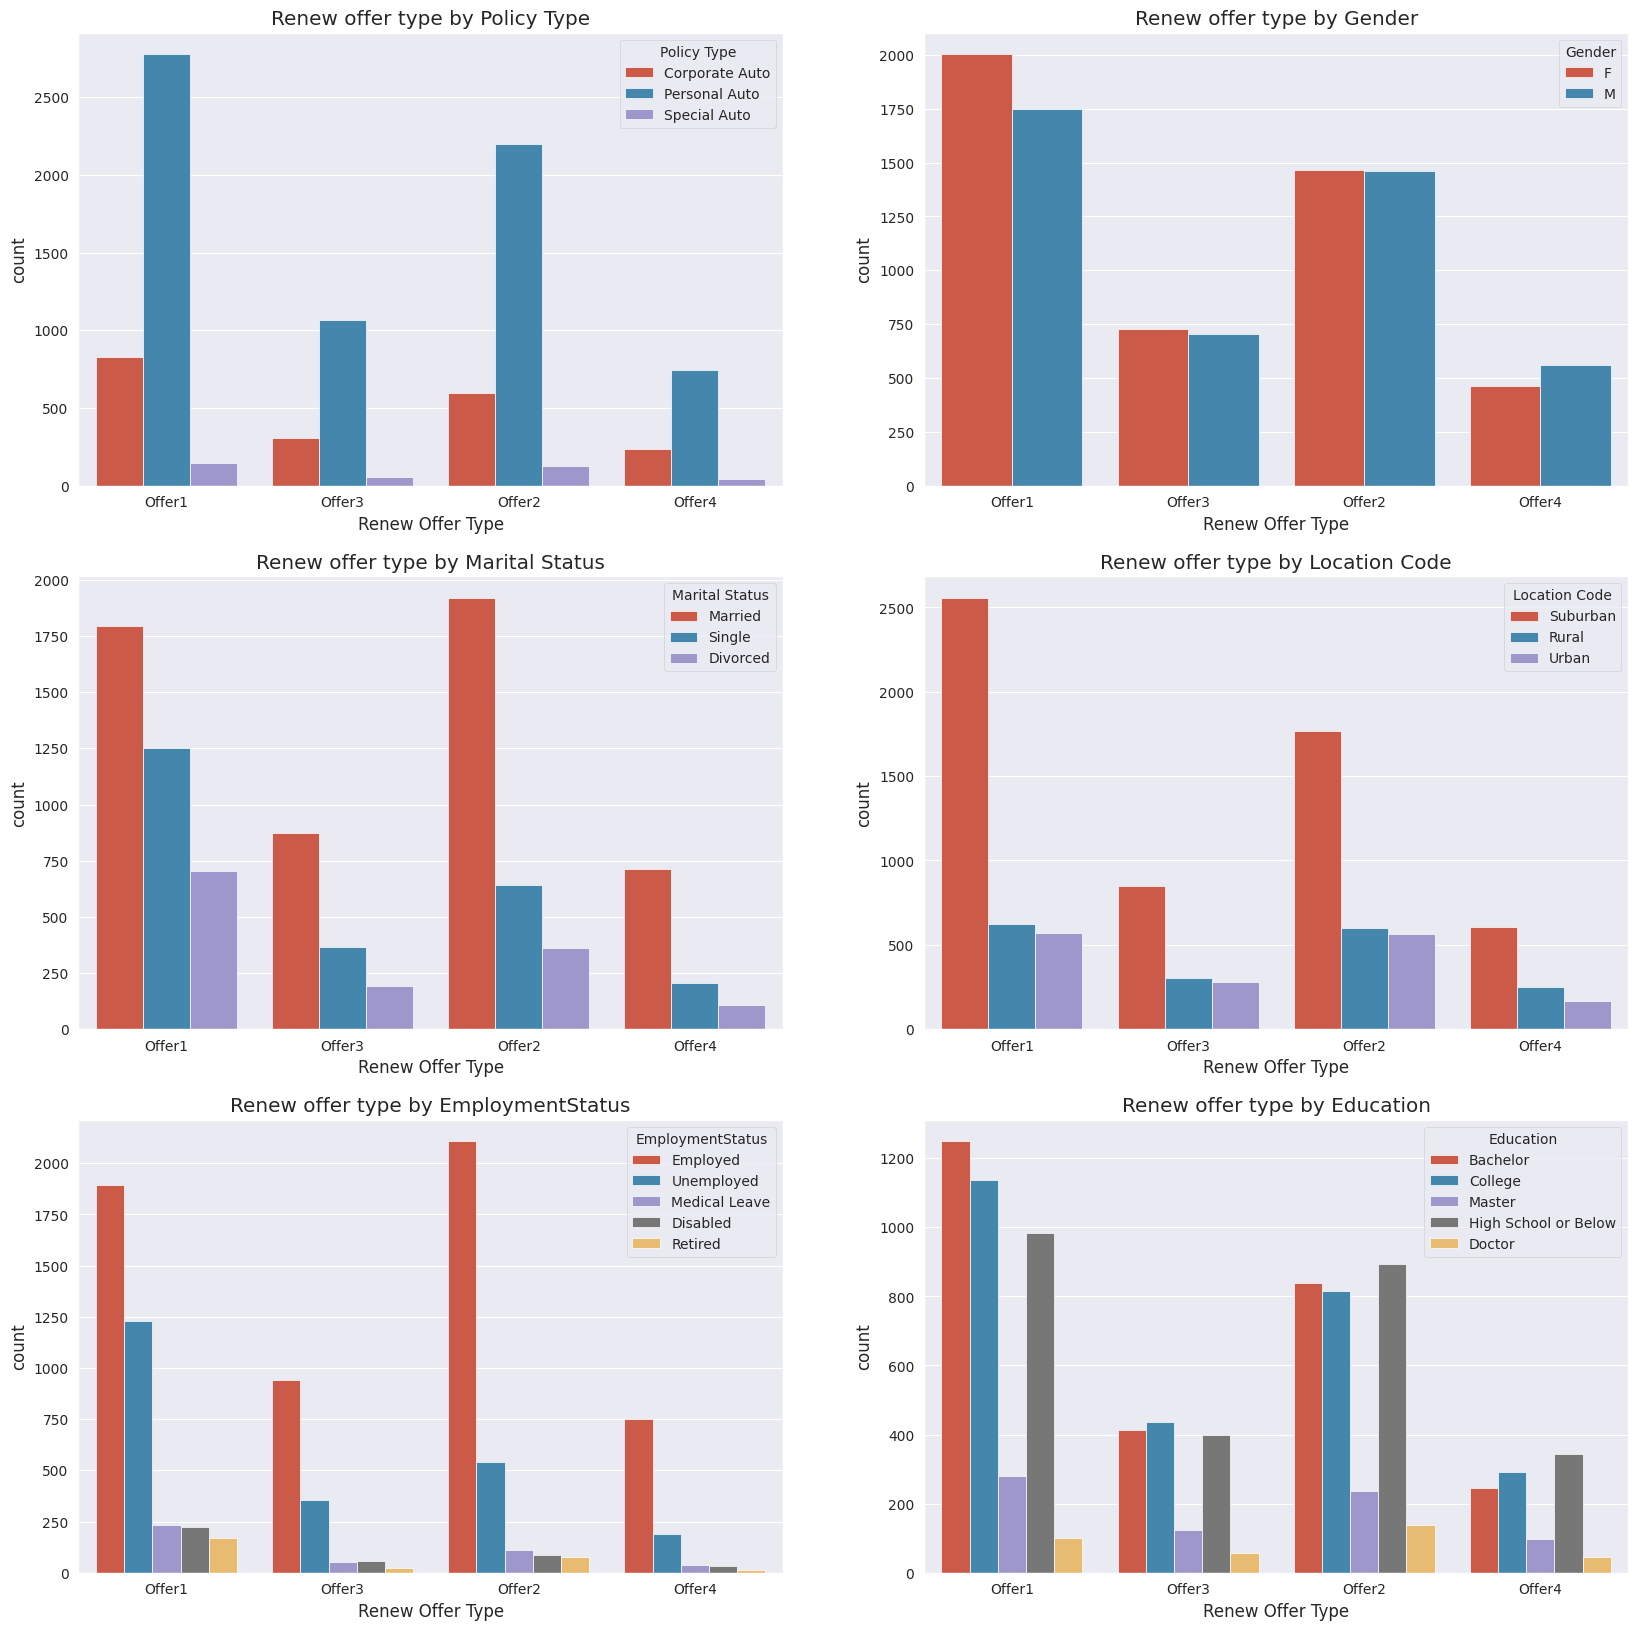

In [ ]:
fig, axes = plt.subplots(3,2 , figsize = (20,20))
columns = ['Policy Type','Gender','Marital Status','Location Code','EmploymentStatus','Education']

for count,column in enumerate(columns):
    i = int(count/2)
    j = int(count%2)
    sns.countplot(x = df['Renew Offer Type'],hue = df[column],ax =axes[i,j]).set_title(f"Renew offer type by {column}")

**customer response**

<Axes: xlabel='Response', ylabel='count'>

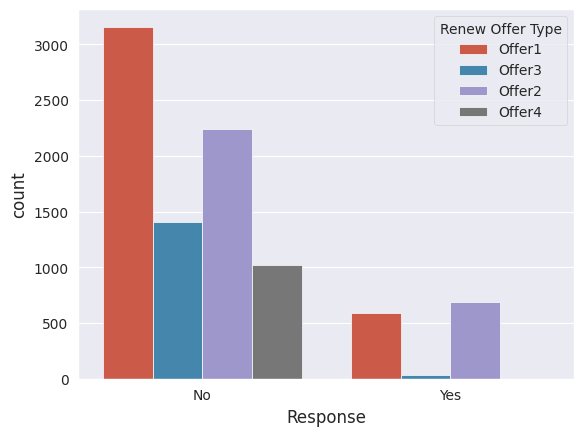

In [ ]:
sns.countplot(x=df['Response'],hue =df['Renew Offer Type'])

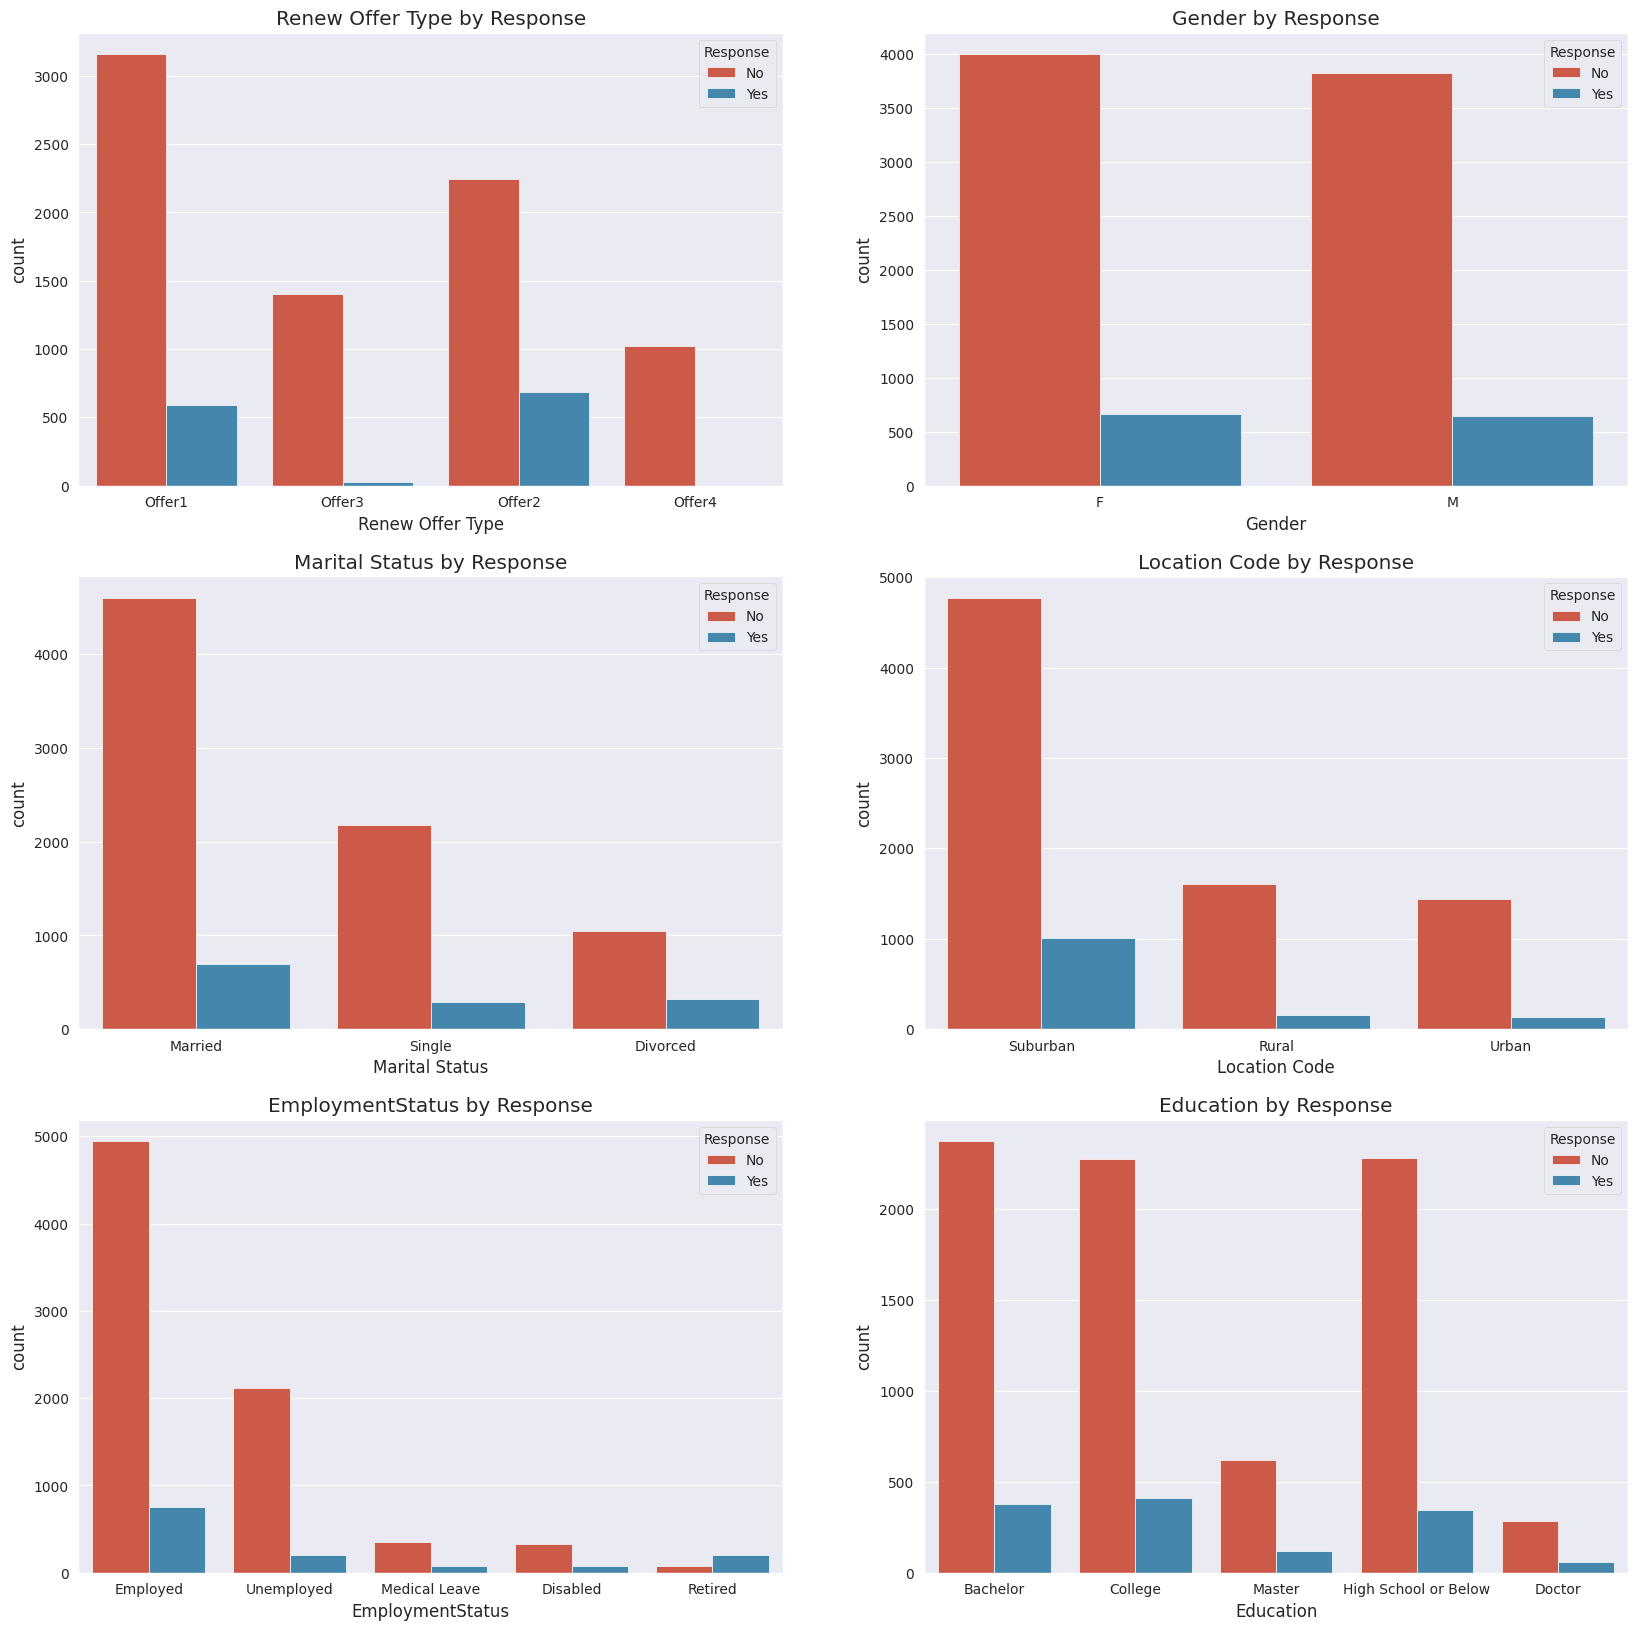

In [ ]:
fig, axes = plt.subplots(3,2 , figsize = (20,20))
columns = ['Renew Offer Type','Gender','Marital Status','Location Code','EmploymentStatus','Education']

for count,column in enumerate(columns):
    i = int(count/2)
    j = int(count%2)
    sns.countplot(x = df[column],hue = df['Response'],ax =axes[i,j]).set_title(f"{column} by Response")

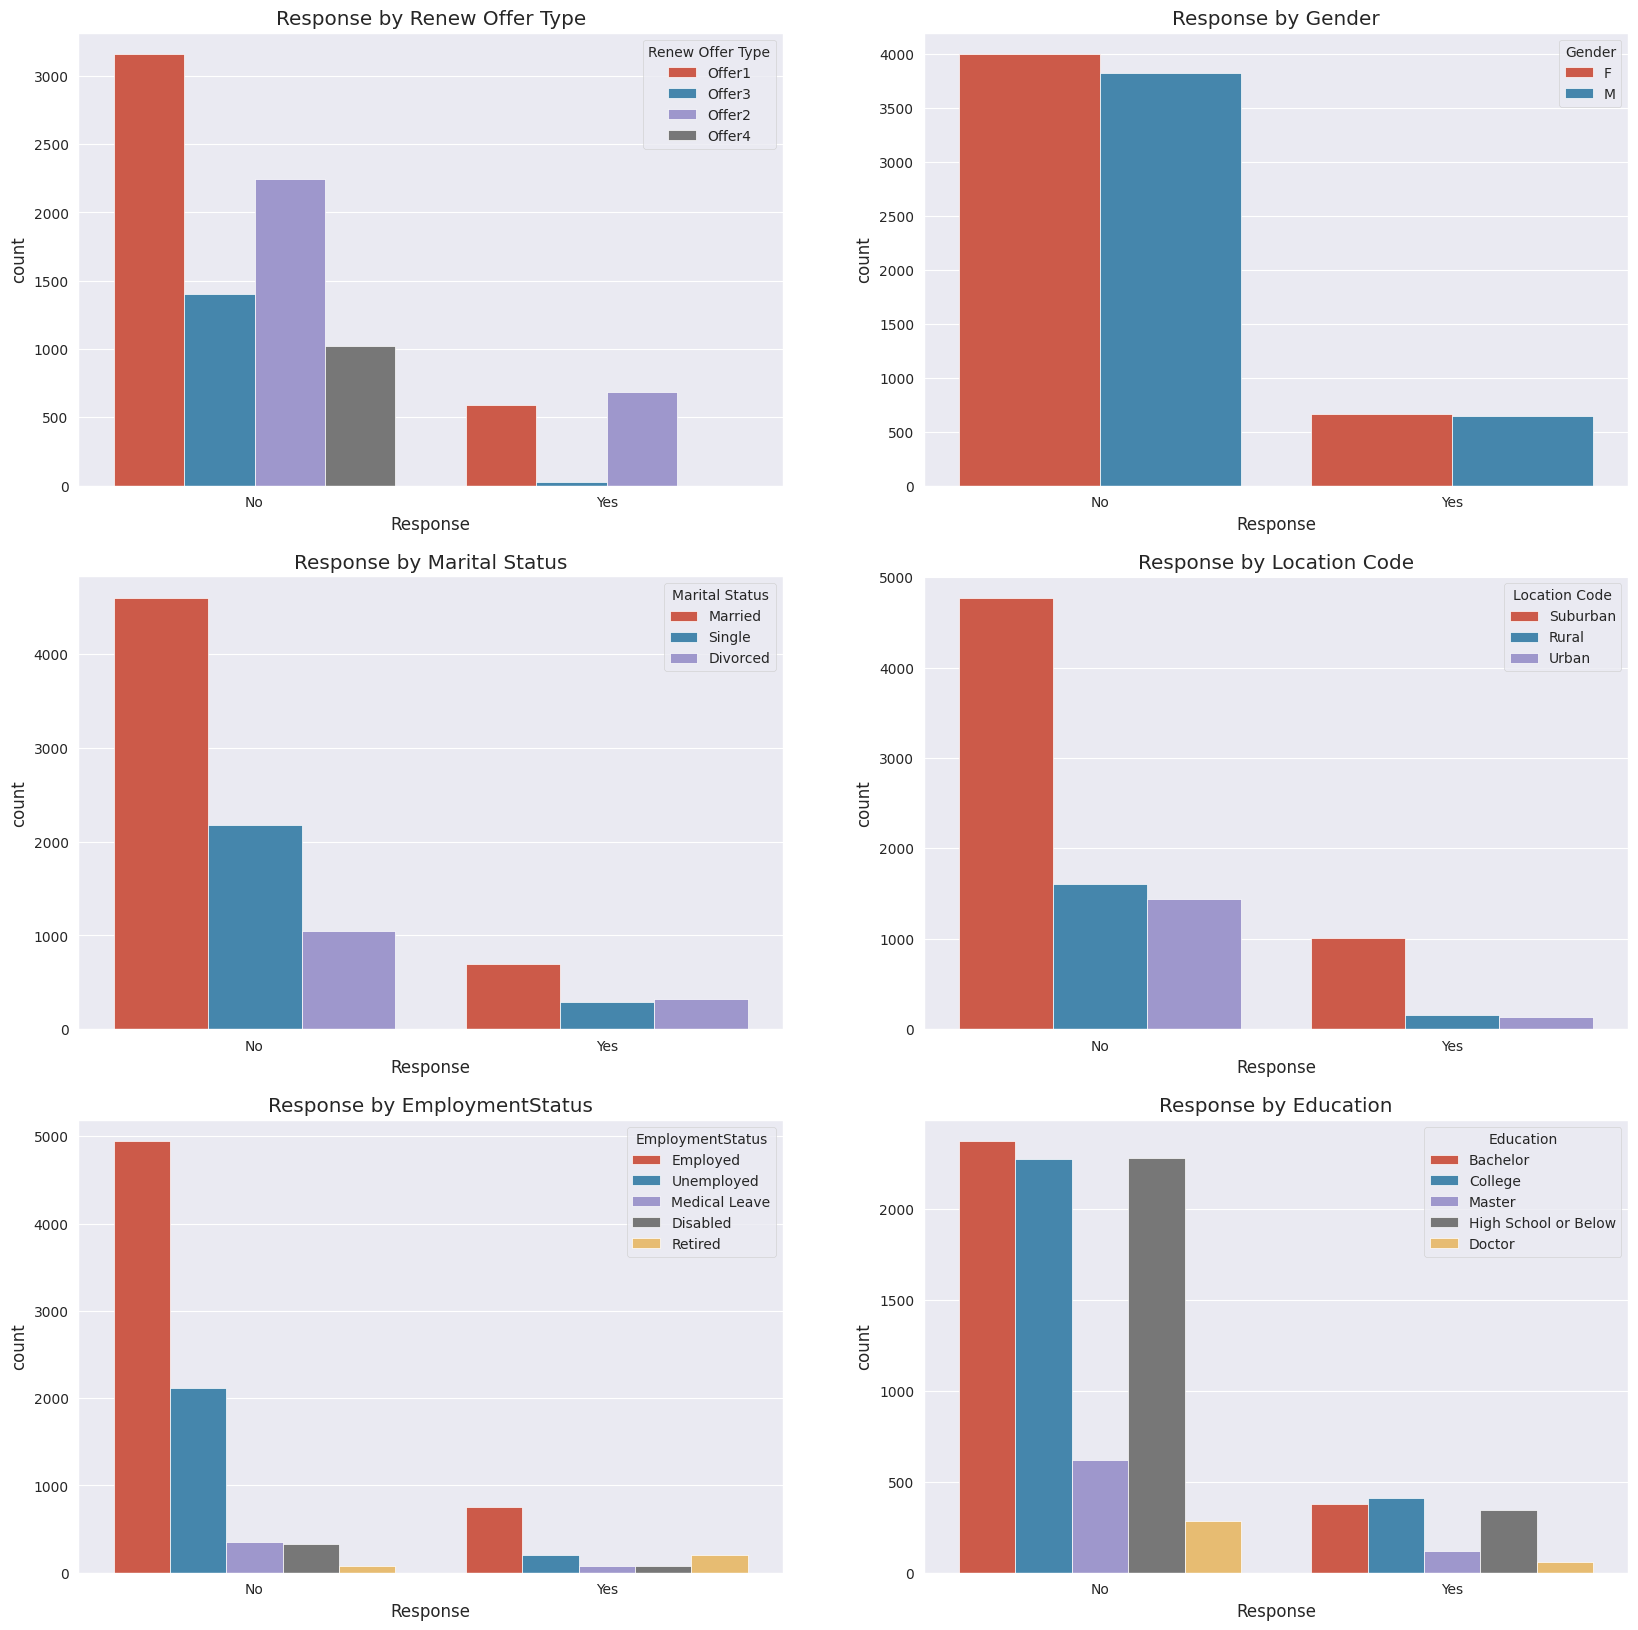

In [ ]:
fig, axes = plt.subplots(3,2 , figsize = (20,20))
columns = ['Renew Offer Type','Gender','Marital Status','Location Code','EmploymentStatus','Education']

for count,column in enumerate(columns):
    i = int(count/2)
    j = int(count%2)
    sns.countplot(x = df['Response'],hue = df[column],ax =axes[i,j]).set_title(f"Response by {column}")

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)

In [ ]:
df1 = df.copy()
df1.drop(['Customer','Effective To Date','Policy Type'],axis=1,inplace=True)

In [ ]:
df1.dtypes

,0
State,object
Customer Lifetime Value,float64
Response,object
Coverage,object
Education,object
EmploymentStatus,object
Gender,object
Income,int64
Location Code,object
Marital Status,object


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le1 =LabelEncoder()
df1['State'] = le1.fit_transform(df1['State'])

In [ ]:
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = OneHotEncoder()
le10 = LabelEncoder()
le11 = LabelEncoder()
le12 = LabelEncoder()
le13 = LabelEncoder()

In [ ]:
df1['Response'] = le2.fit_transform(df1['Response'])
df1['Coverage'] = le3.fit_transform(df1['Coverage'])
df1['Education'] = le4.fit_transform(df1['Education'])

In [ ]:
df1['EmploymentStatus'] = le5.fit_transform(df1['EmploymentStatus'])
df1['Gender'] = le6.fit_transform(df1['Gender'])
df1['Location Code'] = le7.fit_transform(df1['Location Code'])
df1['Marital Status'] = le8.fit_transform(df1['Marital Status'])

In [ ]:
# arr = np.array(df1['Policy'])
# arr_trans = arr.reshape(-1,1)
le111 = LabelEncoder()
df1['Policy'] = le111.fit_transform(df1['Policy'])

In [ ]:
df1['Sales Channel'] = le10.fit_transform(df1['Sales Channel'])
df1['Vehicle Class'] = le11.fit_transform(df1['Vehicle Class'])
df1['Vehicle Size'] = le12.fit_transform(df1['Vehicle Size'])

**For Offer 1**

In [ ]:
offer_groups = df1.groupby('Renew Offer Type')
offer_1 = offer_groups.get_group('Offer1')
X_offer1 = offer_1.drop(['Response','Renew Offer Type'],axis=1)
y_offer1 = offer_1['Response']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_offer1, X_test_offer1,y_train_offer1, y_test_offer1 = train_test_split(X_offer1,y_offer1,test_size=0.2,random_state=42)

In [ ]:
y_train_offer1.value_counts()


,count
Response,
0,2534
1,467


In [ ]:
y_test_offer1.value_counts()

,count
Response,
0,624
1,127


In [ ]:
rf.fit(X_train_offer1,y_train_offer1)

RandomForestClassifier(n_estimators=500)

<BarContainer object of 19 artists>

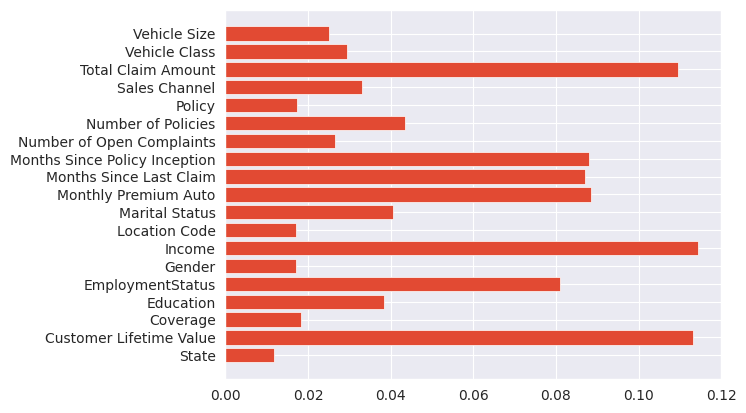

In [ ]:
plt.barh(X_train_offer1.columns, rf.feature_importances_)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = rf.predict(X_test_offer1)
cm=confusion_matrix(y_test_offer1,y_pred)
dp = ConfusionMatrixDisplay(cm)

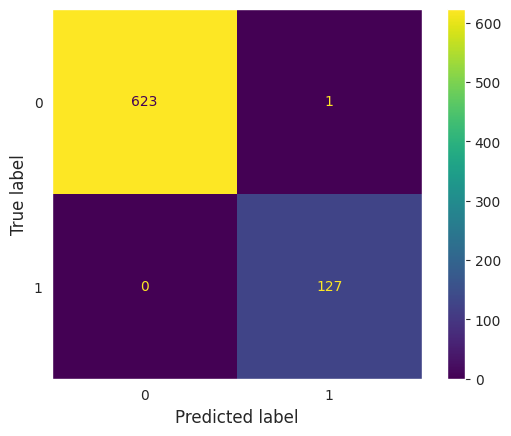

In [ ]:
dp.plot()
plt.grid()

In [ ]:
def evaluate(model,X_train,X_test,y_train,y_test,param=None):


    if param != None:
        gs = GridSearchCV(model, param, cv=5,scoring='f1').fit(X_train, y_train)
        gs.fit(X_train,y_train)
        print("The best hyperparameters are ",gs.best_params_)
        model.set_params(**gs.best_params_)

    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_model_score = f1_score(y_train, y_train_pred)

    test_model_score = f1_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test,y_test_pred)
    cm_train = confusion_matrix(y_train,y_train_pred)
    dp_train = ConfusionMatrixDisplay(cm_train)
    dp_test = ConfusionMatrixDisplay(cm_test)



    print("the test f1_score is", test_model_score )
    print("the training f1_score is", train_model_score)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,ax =axes[0,0])
    axes[0,0].set_title('For test data')
    axes[0,0].grid()

    ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,ax =axes[0,1])
    axes[0,1].set_title('For train data')
    axes[0,1].grid()

    axes[1,0].barh(X_train.columns, model.feature_importances_)
    axes[1,0].set_title('Feature Importance')
    axes[1,0].grid()
    plt.delaxes(axes[1,1])

    plt.show()


the test f1_score is 1.0
the training f1_score is 1.0


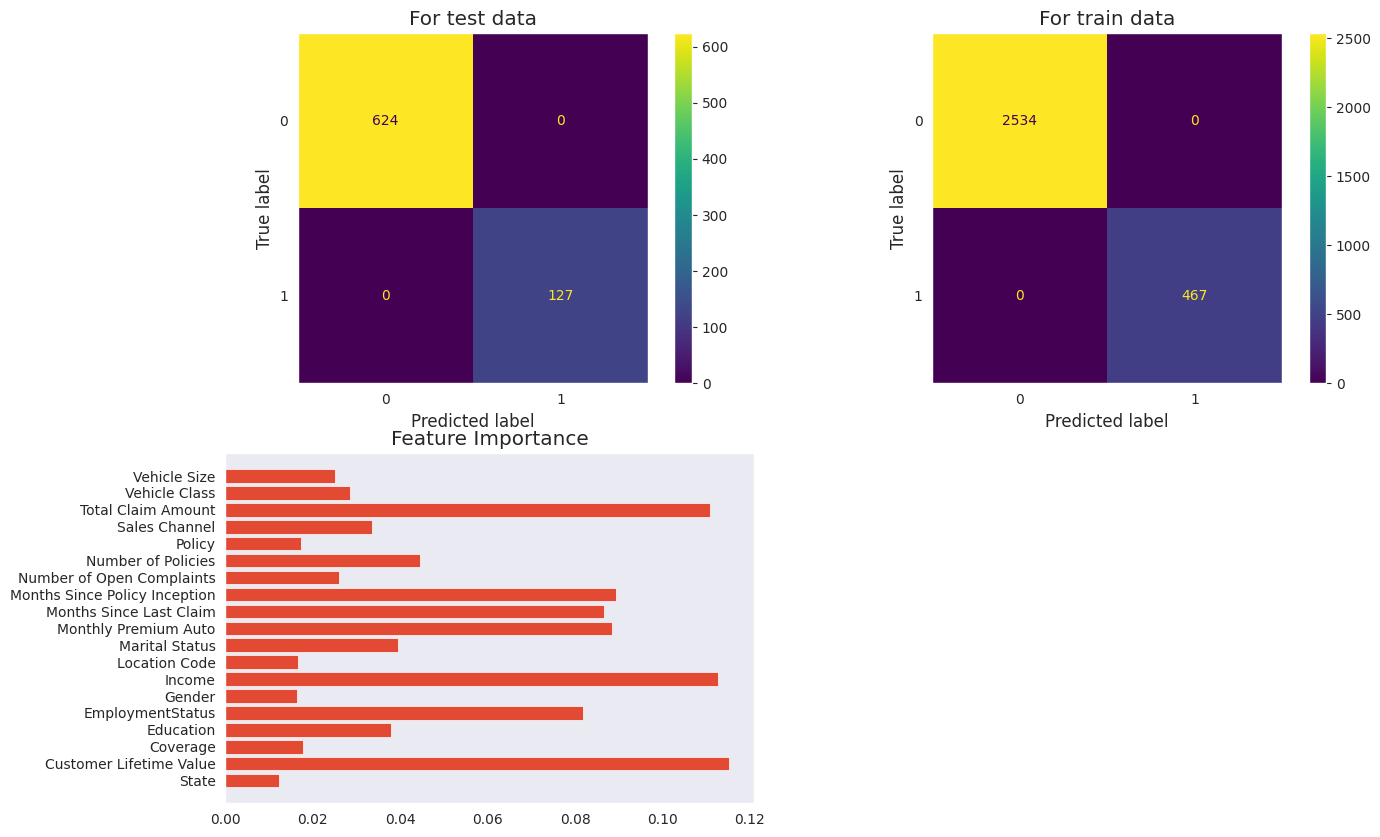

In [ ]:
rf_trail = RandomForestClassifier(n_estimators=500)
evaluate(rf_trail,X_train_offer1,X_test_offer1,y_train_offer1,y_test_offer1)

the test f1_score is 0.9966101694915255
the training f1_score is 1.0


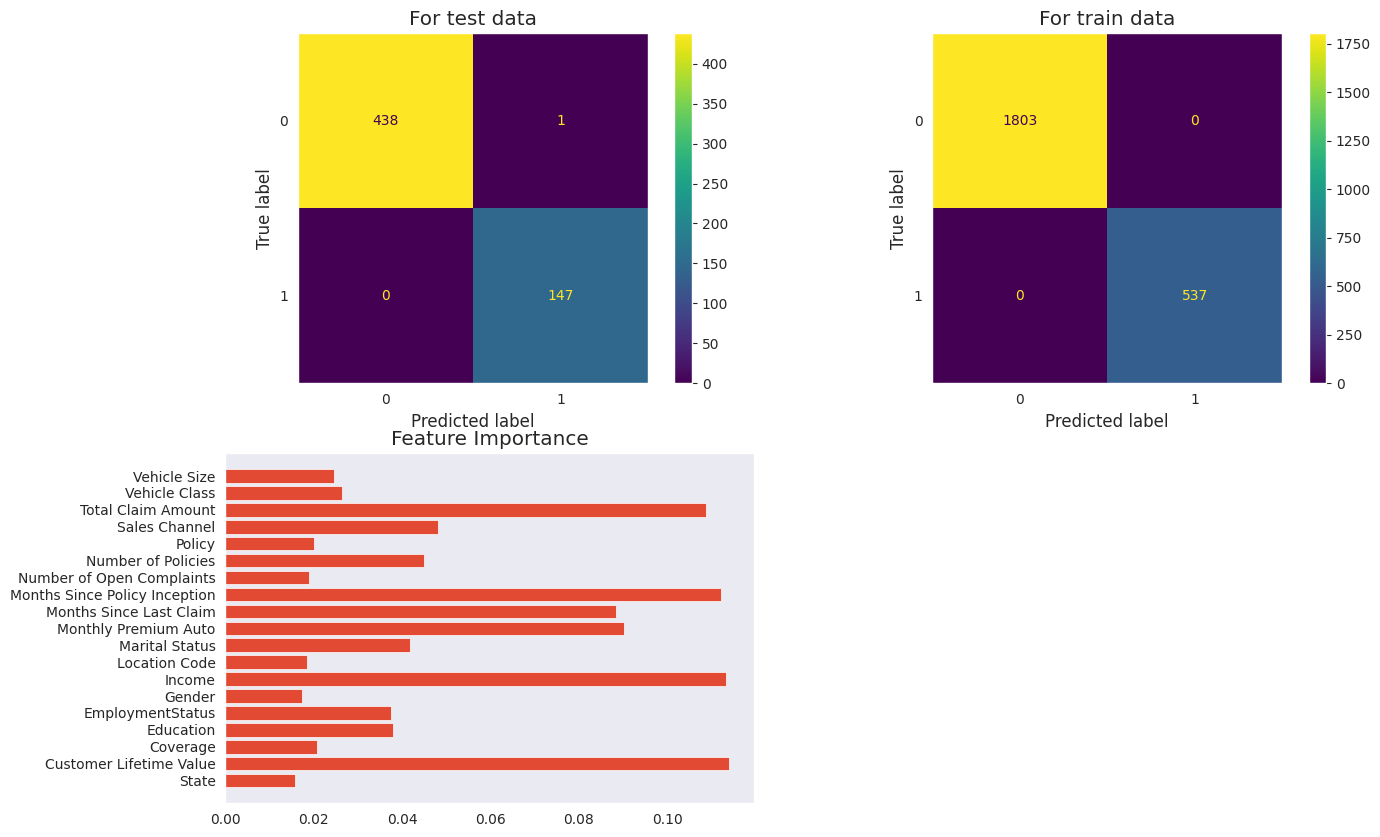

In [ ]:
offer_2 = offer_groups.get_group('Offer2')
X_offer2 = offer_2.drop(['Response','Renew Offer Type'],axis=1)
y_offer2 = offer_2['Response']
X_train_offer2, X_test_offer2,y_train_offer2, y_test_offer2 = train_test_split(X_offer2,y_offer2,test_size=0.2,random_state=42)
rf_2 = RandomForestClassifier(n_estimators=500)
evaluate(rf_2,X_train_offer2,X_test_offer2,y_train_offer2,y_test_offer2)

the test f1_score is 1.0
the training f1_score is 1.0


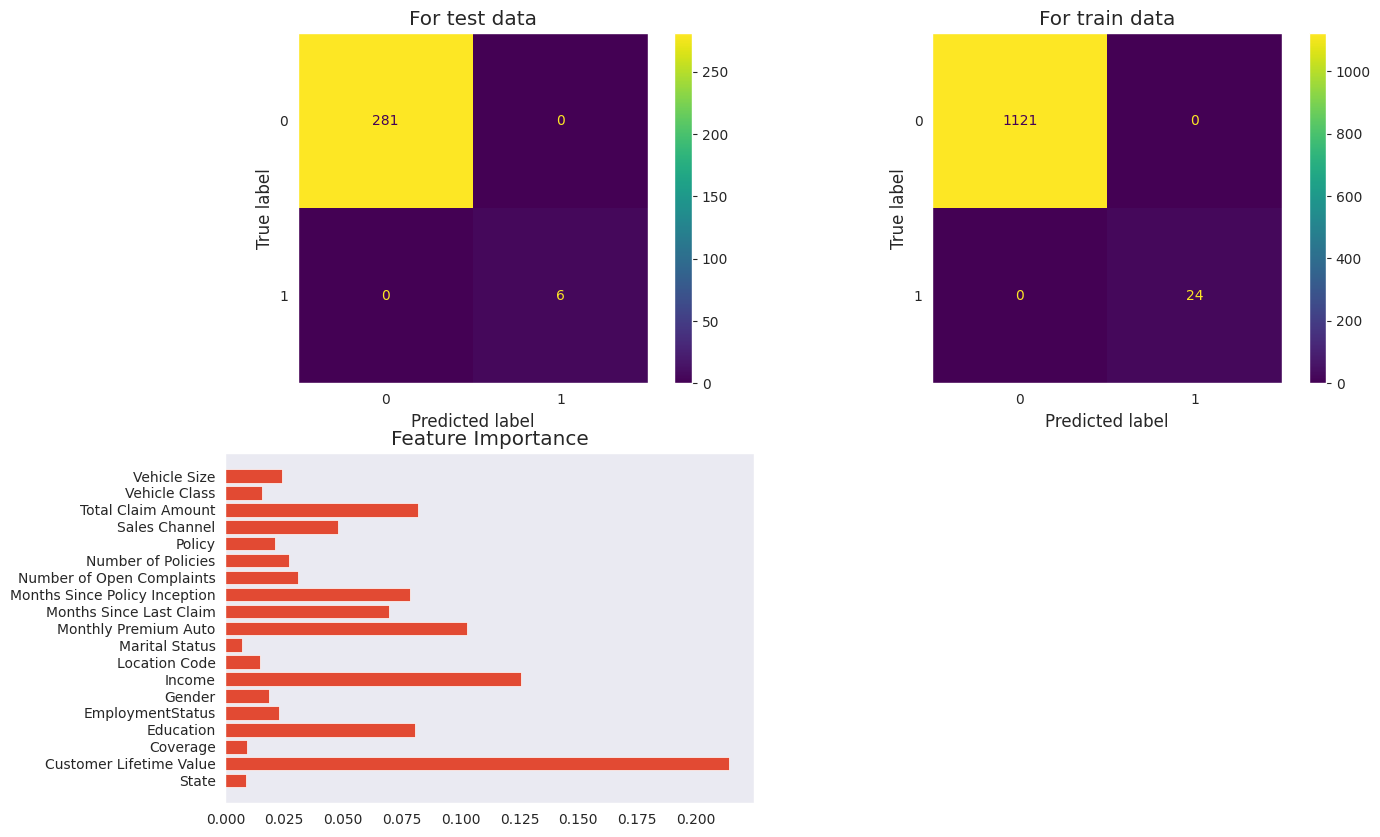

In [ ]:
offer_3 = offer_groups.get_group('Offer3')
X_offer3 = offer_3.drop(['Response','Renew Offer Type'],axis=1)
y_offer3 = offer_3['Response']
X_train_offer3, X_test_offer3,y_train_offer3, y_test_offer3 = train_test_split(X_offer3,y_offer3,test_size=0.2,random_state=42)
rf_3 = RandomForestClassifier(n_estimators=500)
evaluate(rf_3,X_train_offer3,X_test_offer3,y_train_offer3,y_test_offer3)

In [ ]:
df_test = df1.copy()

In [ ]:
X_test =df_test.drop(['Response','Renew Offer Type'],axis=1)
y_pred_offer1 = rf.predict_proba(X_test)
y_pred_offer2 = rf_2.predict_proba(X_test)
y_pred_offer3 = rf_3.predict_proba(X_test)
y_pred_offer1_yes = y_pred_offer1[:,1]
y_pred_offer2_yes = y_pred_offer2[:,1]
y_pred_offer3_yes = y_pred_offer3[:,1]
y_yes = np.empty((df_test.shape[0],3))
y_yes[:,0]= y_pred_offer1_yes
y_yes[:,1] = y_pred_offer2_yes
y_yes[:,2] = y_pred_offer3_yes
# y_yes = np.concatenate((y_pred_offer1_yes,y_pred_offer2_yes,y_pred_offer3_yes),axis =1)
compare = np.argmax(y_yes,axis=1)
y_pred = []
for i in compare:
    if i ==0:
        y_pred.append('offer1')
    elif i ==1:
        y_pred.append('offer2')
    elif i == 2:
        y_pred.append('offer3')
final_offer = np.array(y_pred)

df_test['offer1_yes'] = y_pred_offer1_yes
df_test['offer2_yes'] = y_pred_offer2_yes
df_test['offer3_yes'] = y_pred_offer3_yes
df_test['final_offer'] = final_offer

df_test[['Renew Offer Type','Response','offer1_yes','offer2_yes','offer3_yes','final_offer']]

,Renew Offer Type,Response,offer1_yes,offer2_yes,offer3_yes,final_offer
0,Offer1,0,0.056,0.126,0.000,offer2
1,Offer3,0,0.004,0.020,0.000,offer2
2,Offer1,0,0.028,0.170,0.000,offer2
3,Offer1,0,0.058,0.110,0.000,offer2
4,Offer1,0,0.008,0.288,0.000,offer2
...,...,...,...,...,...,...
9129,Offer2,0,0.028,0.008,0.026,offer1
9130,Offer1,1,0.918,0.158,0.000,offer1
9131,Offer1,0,0.002,0.026,0.004,offer2
9132,Offer3,0,0.066,0.058,0.014,offer1


In [ ]:
no = df_test[df_test['Response']==0]
yes = df_test[df_test['Response']==1]

In [ ]:
yes[['Renew Offer Type','offer1_yes','offer2_yes','offer3_yes','final_offer']]

,Renew Offer Type,offer1_yes,offer2_yes,offer3_yes,final_offer
5,Offer2,0.006,0.914,0.000,offer2
6,Offer1,0.912,0.056,0.008,offer1
8,Offer1,0.958,0.232,0.076,offer1
13,Offer2,0.054,0.960,0.000,offer2
22,Offer1,0.948,0.224,0.082,offer1
...,...,...,...,...,...
9110,Offer2,0.238,0.974,0.000,offer2
9119,Offer1,0.968,0.096,0.000,offer1
9122,Offer1,0.974,0.162,0.006,offer1
9123,Offer2,0.070,0.960,0.000,offer2


In [ ]:
no[['Renew Offer Type','offer1_yes','offer2_yes','offer3_yes','final_offer']]

,Renew Offer Type,offer1_yes,offer2_yes,offer3_yes,final_offer
0,Offer1,0.056,0.126,0.000,offer2
1,Offer3,0.004,0.020,0.000,offer2
2,Offer1,0.028,0.170,0.000,offer2
3,Offer1,0.058,0.110,0.000,offer2
4,Offer1,0.008,0.288,0.000,offer2
...,...,...,...,...,...
9128,Offer1,0.206,0.200,0.000,offer1
9129,Offer2,0.028,0.008,0.026,offer1
9131,Offer1,0.002,0.026,0.004,offer2
9132,Offer3,0.066,0.058,0.014,offer1


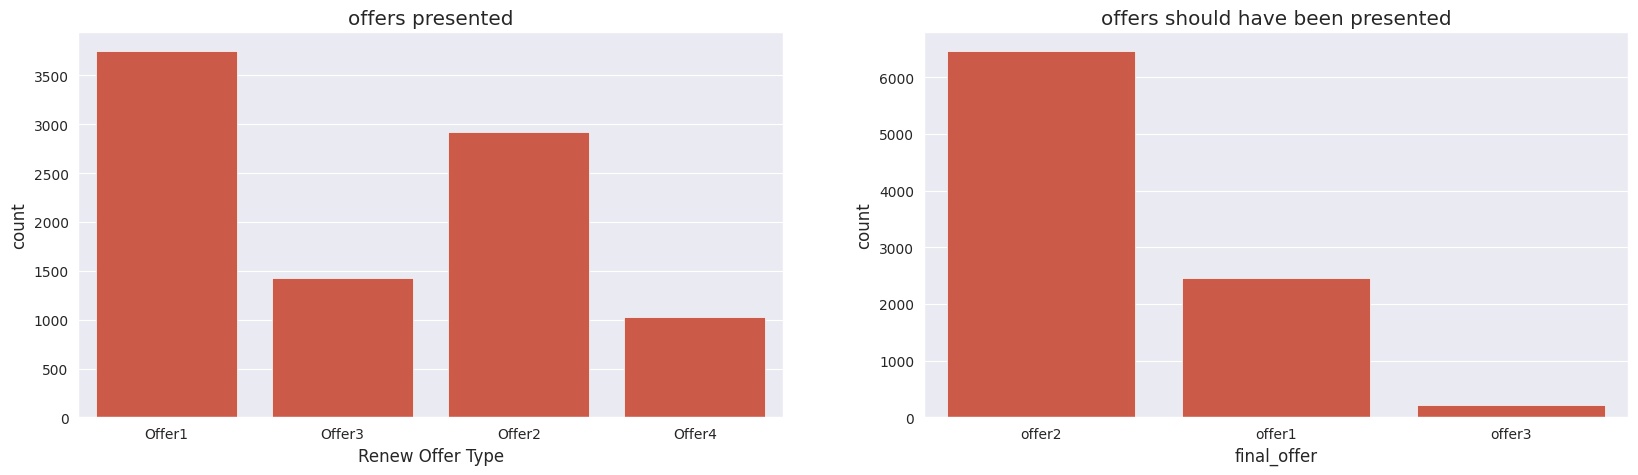

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x=df_test['Renew Offer Type'],ax=axes[0])
axes[0].set_title('offers presented')
sns.countplot(x=df_test['final_offer'],ax=axes[1])
axes[1].set_title('offers should have been presented')
plt.show()

**K means Clustering**

In [ ]:
df_kmc = df1.copy()
le_offer = LabelEncoder()
df_kmc['Renew Offer Type'] = le_offer.fit_transform((df_kmc['Renew Offer Type']))

In [ ]:
wcss= []
for i in range(1,12):
    km = KMeans(n_clusters = i)
    km.fit_predict(df_kmc)
    wcss.append(km.inertia_)


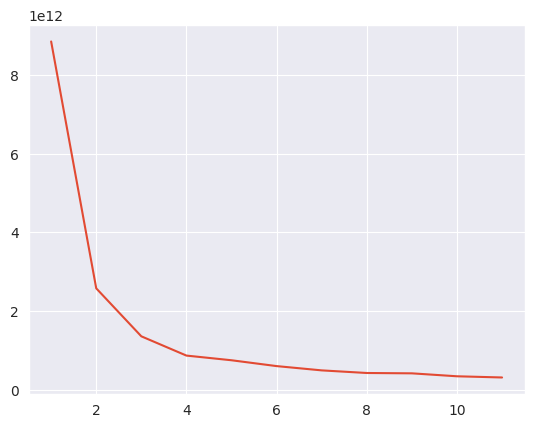

In [ ]:
plt.plot(range(1,12),wcss)

Number of cluster = 3,4 seems correct

In [ ]:
def kmeans_plotter(data,n_clusters):
    pca = PCA(2)
    transformed =  pca.fit_transform(data)
    kmean = KMeans(n_clusters=n_clusters)
    label = kmean.fit_predict(transformed)
    for i in range(n_clusters):
        plt.scatter(transformed[label==i][:,0],transformed[label==i][:,1])
    plt.show()


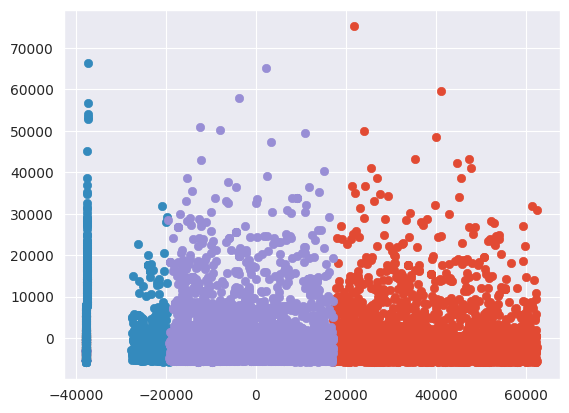

In [ ]:
kmeans_plotter(df_kmc,n_clusters=3)

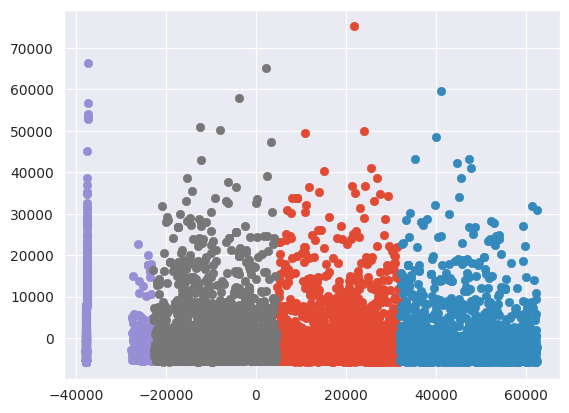

In [ ]:
kmeans_plotter(df_kmc,n_clusters=4)

therefore number of clusters = 3 looks best
Hence there must be 3 offers for customers

In [ ]:
from sklearn.preprocessing import StandardScaler
def kmeans_plotter(data,n_clusters):
    pca = PCA(2)
    ss = StandardScaler()
    data = ss.fit_transform(data)
    transformed =  pca.fit_transform(data)
    kmean = KMeans(n_clusters=n_clusters)
    label = kmean.fit_predict(transformed)
    for i in range(n_clusters):
        plt.scatter(transformed[label==i][:,0],transformed[label==i][:,1])
    plt.show()



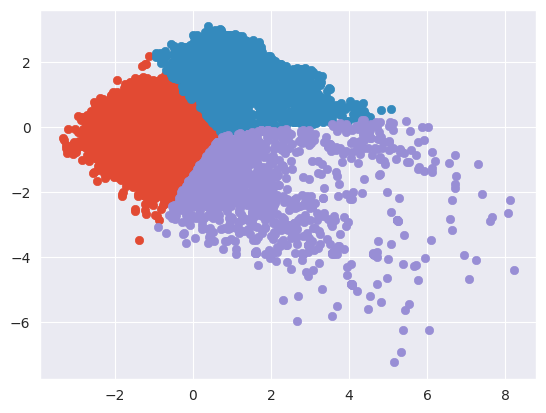

In [ ]:
kmeans_plotter(df_kmc,n_clusters=3)

**Predicting Customer Lifetime Value**

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.



In [ ]:
df
df2 = df.copy()
df2

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
df2.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
df2.drop(columns=['Customer','Response','Renew Offer Type','Effective To Date','State','Policy Type'],axis=1,inplace=True)

In [ ]:
l1 = LabelEncoder()
l2 = LabelEncoder()
l3 = LabelEncoder()
l4 = LabelEncoder()
l5 = LabelEncoder()
l6 = LabelEncoder()
l7 = LabelEncoder()
l8 = LabelEncoder()
l9 = LabelEncoder()
l10 = LabelEncoder()


TypeError: LabelEncoder() takes no arguments

In [ ]:
df2['Coverage'] = l1.fit_transform(df2['Coverage'])
df2['Education'] = l2.fit_transform(df2['Education'])
df2['EmploymentStatus'] = l3.fit_transform(df2['EmploymentStatus'])
df2['Gender'] = l4.fit_transform(df2['Gender'])
df2['Location Code'] = l5.fit_transform(df2['Location Code'])
df2['Marital Status'] = l6.fit_transform(df2['Marital Status'])
df2['Sales Channel'] = l7.fit_transform(df2['Sales Channel'])
df2['Vehicle Class'] = l8.fit_transform(df2['Vehicle Class'])
df2['Vehicle Size'] = l9.fit_transform(df2['Vehicle Size'])
df2['Policy'] = l10.fit_transform(df2['Policy'])

In [ ]:
df2.isnull().sum()

,0
Customer Lifetime Value,0
Coverage,0
Education,0
EmploymentStatus,0
Gender,0
Income,0
Location Code,0
Marital Status,0
Monthly Premium Auto,0
Months Since Last Claim,0


In [ ]:
df2


,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,2763.519279,0,0,1,0,56274,1,1,69,32,5,0,1,2,0,384.811147,5,1
1,6979.535903,1,0,4,0,0,1,2,94,13,42,0,8,5,0,1131.464935,0,1
2,12887.431650,2,0,1,0,48767,1,1,108,18,38,0,2,5,0,566.472247,5,1
3,7645.861827,0,0,4,1,0,1,1,106,18,65,0,7,1,2,529.881344,3,1
4,2813.692575,0,0,1,1,43836,0,2,73,12,44,0,1,3,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,0,0,1,1,71941,2,1,73,18,89,0,2,3,3,198.234764,0,1
9130,3096.511217,1,1,1,0,21604,1,0,79,14,28,0,1,2,1,379.200000,0,1
9131,8163.890428,1,0,4,1,0,1,2,85,9,37,3,2,1,1,790.784983,0,1
9132,7524.442436,1,1,1,1,21941,1,1,96,34,3,0,3,4,1,691.200000,0,0


In [ ]:
X = df2.drop(columns= ['Customer Lifetime Value'],axis =1)
y = df2['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
X_cat = X.select_dtypes(exclude=[np.number])
categorical_features=X_cat.columns

In [ ]:
#categorical_features = [i for i, col in enumerate(X.columns) if X[col].dtype in ['object','int64', 'int32']]
def evaluate(model,X_train,X_test,y_train,y_test,param=None):


    if param != None:
        gs = GridSearchCV(model, param, cv=5,scoring='f1').fit(X_train, y_train)
        gs.fit(X_train,y_train)
        print("The best hyperparameters are ",gs.best_params_)
        model.set_params(**gs.best_params_)

    # if isinstance(model, CatBoostRegressor):
    #     model.fit(X_train, y_train, cat_features=categorical_features)
    # else:  # For other models like LGBMRegressor
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_model_score = r2_score(y_train, y_train_pred)

    test_model_score = r2_score(y_test, y_test_pred)
    print("the test r2_score is", test_model_score )
    print("the training r2_score is", train_model_score)


In [ ]:
cat = CatBoostRegressor(verbose=False)
evaluate(cat,X_train,X_test,y_train,y_test)

the test r2_score is 0.7185749579016822
the training r2_score is 0.8606941856543384


In [ ]:
lr = LGBMRegressor()
evaluate(lr,X_train,X_test,y_train,y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 8220, number of used features: 17
[LightGBM] [Info] Start training from score 8016.729026
the test r2_score is 0.6968627447686646
the training r2_score is 0.8658558179627458


In [ ]:
from sklearn.ensemble import RandomForestRegressor

evaluate(RandomForestRegressor(), X_train, X_test, y_train, y_test)



the test r2_score is 0.7079132631802272
the training r2_score is 0.958225542800373
